In [1]:
state = 'fl'

from config import *
db, context = cfg_init(state)
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib import cm

In [2]:
def calculate(service, time_step, db, context):
    '''
    calculate the ecdf at a certain time
    '''
    con = db['con']
    # import the distance to the nearest service for this time
    sql = 'SELECT id_orig, time_stamp, distance FROM {} WHERE time_stamp = %s AND service = %s'.format(context['nearest_db_name'])
    dist = pd.read_sql(sql, con, params = (time_step, service,))
    # import number of people
    sql = 'SELECT "H7X001", "H7X002", "H7X003", geoid10 FROM demograph;'
    pop = pd.read_sql(sql, db['con'])
    pop = pop.loc[pop['H7X001'] != 0]
    # merge population into blocks
    pop = pop.merge(dist, left_on = 'geoid10', right_on = 'id_orig')
    pop['white'] = pop.H7X002
    pop['all'] = pop.H7X001
    pop['black'] = pop.H7X003
    # total population
    pop_total = pop.H7X001.sum()
    # pop_black
    pop_black_total = pop.black.sum()
    pop_white_total = pop.white.sum()
    # sort df by distance (ascending)
    pop = pop.sort_values('distance')
    # column for percent of residents
    pop['perc'] = pop.H7X001.cumsum()/pop_total*100
    pop['black_perc'] = pop.black.cumsum()/pop_black_total*100
    pop['white_perc'] = pop.white.cumsum()/pop_white_total*100
    # return df
    return(pop)

In [3]:
con = db['con']

In [4]:
sql = "SELECT DISTINCT time_stamp FROM {} ORDER BY time_stamp ASC".format(context['nearest_db_name'])
times = pd.read_sql(sql, con)

In [5]:
sql = "SELECT DISTINCT time_stamp FROM {} ORDER BY time_stamp ASC".format(context['nearest_db_name'])
times = pd.read_sql(sql, con)

In [6]:
times.loc[100].values[0]

numpy.datetime64('2018-10-13T04:00:00.000000000')

In [7]:
# fl
# gas_station
# time_steps = ['2018-10-09 00:00:00','2018-10-13 00:00:00','2018-10-14 00:00:00']
# supermarket
time_steps = ['2018-10-09 00:00:00','2018-10-13 00:00:00','2018-10-14 00:00:00']

In [8]:
#nc
# gas_station
# time_steps = ['2018-09-08 00:00:00','2018-09-18 00:00:00','2018-09-20 00:00:00']
# supermarket
# time_steps = ['2018-09-08 00:00:00','2018-09-16 00:00:00','2018-09-18 00:00:00']

In [9]:
services = ['supermarket']

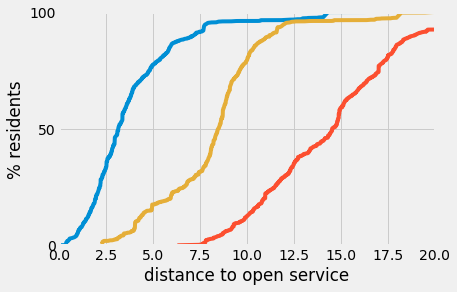

In [10]:
con = db['con']
# fig, ax = plt.subplots()
for time_step in time_steps:
    for service in services:
        # calculate the ecdf data
        pop = calculate(service, time_step, db, context)
        # plot the cdf
        plt.plot(pop.distance/1000, pop.perc, label = service)
# ylabel
plt.ylabel('% residents')
# xlabel
plt.xlabel('distance to open service')
plt.xlim([0,20])
plt.ylim([0,100])
plt.yticks([0,50,100])
# save
fig_out = '../data/fig/{}_{}_cdf.pdf'.format(state, service)
if os.path.isfile(fig_out):
    os.remove(fig_out)
plt.savefig(fig_out,dpi=600,orientation='landscape',format='pdf',facecolor='w', edgecolor='w',transparent=True, bbox_inches="tight")
# present
plt.show()